# Introducción a Python Científico

## Índice

 * [Scientific Computing Tools for Python](#Scientific-Computing-Tools-for-Python)
 * [Energía y potencia](#Energia-y-potencia)
     * [SymPy](#SymPy)
 * [Secuencias](#Secuencias)
     * [Numpy](#Numpy)
         * [Importando la librería y creando un array](#Importando-la-libreria-y-creando-un-array)
         * [Listas y arrays](#Listas-y-arrays)
     * [Matplotlib](#Matplotlib) 
 * [Señales discretas básicas](#Señales-discretas-básicas)   
     * [Impulso unitario (delta de Kronecker)](#Impulso-unitario-(delta-de-Kronecker))
     * [Pulso rectangular](#Pulso-rectangular)
     * [Escalón unitario o heaviside discreta](#Escalon-unitario-o-heaviside-discreta)
     * [Propiedades de las señales](#Propiedades-de-las-señales)  
 * [Otras señales de interes](#Otras-señales-de-interes)
     * [Rampa](#Rampa)
     * [Secuencia exponencial de valores reales](#Secuencia-exponencial-de-valores-reales)
     * [Secuencia exponencial de valores complejos](#Secuencia-exponencial-de-valores-complejos)
     * [Secuencia senoidal](#Secuencia-senoidal)
     * [Secuencia aleatoria](#Secuencia-aleatoria)
     * [Funcion Sinc](#Funcion-Sinc)
     * [Pulso unitario desplazado y escalado](#Pulso-unitario-desplazado-y-escalado)
     * [Escalón unitario desplazado y escalado](#Escalón-unitario-desplazado-y-escalado)     
 * [Tipos de datos](#Tipos-de-datos)
 * [Longitud y dimensiones de un array](#Longitud-y-dimensiones-de-un-array)
 * [Indizado en arrays](#Indizado-en-arrays)
 * [Referencias](#Referencias)
 * [Licencia](#Licencia)

## Objetivos del notebook

* Importar y trabajar con librerias de Scipy (Sympy, numpy y matplotlib)
* Calcular energía y potencia.
* Definir y trabajar con señales básicas.
* Conocer sobre tipo de datos.

## Scientific Computing Tools for Python

Se denomina **SciPy (Scientific Comuting Tools for Python)** a todo el paquete de librerías que engloba a Numpy, Matplotlib, la librería del mismo nombre, Sympy y Pandas. Éstas, en su conjunto, proveen **herramientas Open Source** para la **implementación de operaciones matemáticas y algebraicas, algoritmos de procesamiento de señales, estadísticas y graficadores en 2 y 3 dimensiones**.

![](../img/scipy-org.png)

**Podemos encontrar una extensa documentación en su [página web](https://www.scipy.org/)**

**Para lo usuarios de [MATLAB](https://www.mathworks.com/products/matlab.html) la [siguiente documentación](https://www.mathworks.com/products/matlab.html) es util para facilitar la migración.**

## Energia y potencia

En muchas aplicaciones, aunque no en todas, las señales que examinamos están directamente realacionas con cantidades físicas que capturan potencia y energia de un sistema físico [Oppenheim A.,pp. 5-7, 1998]. Por ejemplo, el voltaje y la corriente a través de un resistor con resistencia R, entonces la **potencia istantánea** es:

$$ p(t)=v(t)i(t)=\frac {1}{R}v^2(t) $$

Entonces la **energía total** gastada durante un **intervalo de tiempo continuo** $[t_1:t_2]$ se define como:

$$E[p(t)]_{t_1 \rightarrow t_2} = \int_{t_1}^{t_2} p(t) dt = \int_{t_1}^{t_2} \frac {1}{R} \vert v(t) \vert^2 dt$$

La **potencia promedio** durante el mismo **intervalo de tiempo continuo** $[t_1:t_2]$ es:

$$P[p(t)]_{t_1 \rightarrow t_2} = \frac {1}{t_2-t_1} \int_{t_1}^{t_2} p(t) dt = \frac {1}{t_2-t_1} \int_{t_1}^{t_2} \frac {1}{R} \vert v(t) \vert^2 dt$$

De lo presentado anteriormente se desprende la definición de **energia total** durante un **intervalo de tiempo continuo** $[t_1:t_2]$:

$$E[x(t)]_{t_1 \rightarrow t_2} = \int_{t_1}^{t_2} \vert x(t) \vert^2 dt$$

En el **caso discreto** de una señal $x[n]$ en el intervalo $[N_1:N_2]$ se define como:

$$E[x[n]]_{N_1 \rightarrow N_2} = \sum_{n \rightarrow N_1}^{N_2} \vert x[n] \vert^2$$

Y la definición de la **potencia promedio** durante el mismo **intervalo de tiempo continuo** $[t_1:t_2]$:

$$P[x(t)]_{t_1 \rightarrow t_2} = \frac {1}{t_2-t_1} \int_{t_1}^{t_2} \vert x(t) \vert^2 dt$$

En el **caso discreto** de una señal $x[n]$ en el intervalo $[N_1:N_2]$ se define como:

$$P[x[n]]_{N_1 \rightarrow N_2} = \frac {1}{N_2-N_1+1} \sum_{n \rightarrow N_1}^{N_2} \vert x[n] \vert^2$$

Con $\vert x(t) \vert$ la magnitud de una señal continua o señal discreta .

En muchos sistemas nos interesa examinar la **potencia** y **energía de señales** en un **intervalo de tiempo infinito**:
* **Energía** total para tiempo **continuo**:

$$E_\infty=\lim_{T \to \infty }\int _{-T}^{T} \vert x(t) \vert^2 dt=\int _{-\infty}^{\infty} \vert x(t) \vert^2 dt$$

* **Energía** total para tiempo **discreto**:

$$E_\infty=\lim_{N \to \infty }\sum _{n=-N}^{N} \vert x[n] \vert^2 =\sum_{n=-\infty}^{\infty} \vert x[n] \vert^2$$

* **Potencia** promedio para tiempo **continuo**:

$$P_\infty=\lim_{T \to \infty } \frac{1}{2T} \int _{-T}^{T} \vert x(t) \vert^2 dt$$

* **Potencia** promedio para tiempo **discreto**:

$$P_\infty=\lim_{N \to \infty } \frac{1}{2N+1} \sum_{n=-N}^{N} \vert x[n] \vert^2 $$


El analisis de las señales $x(t)$ o $x[n]$ en un **intervalo infinito** permite identificar tres clases importantes de señales: 
* Son señales con **energía finita (o señales de energía)**, si y sólo si, $0<E_\infty<\infty$ (**energía total finita**). Una señal de este tipo debe tener una **potencia promedio igual a cero**, ya que, en el caso de tiempo continuo, por ejemplo, vemos que:
$$P_\infty=\lim_{T \to \infty}\frac{E_\infty}{2T}=0$$

* Son señales con **potencia promedio finita (señales de potencia)**, si y sólo si $0<P<\infty$ (**potencia promedio finita**). Entonces, si $P_\infty >0$, por necesidad $E_\infty \to \infty$. Esto tiene sentido, ya que si se tiene una energía promedio por unidad de tiempo diferente de cero, entonces integrando o sumando en un intervalo de tiempo infinito produce una cantidad de **energía infinita**. Por ejemplo, la señal constante $x[n]=4$ tiene energía infinita, pero la potencia promedio es $P_\infty=16$. Otro ejemplo de esto son las señales periodicas.

* Señales con **energia** y **potencia promedio infinita**, por ejemplo la señal $x(t)=t$.

### SymPy

![](../img/sympy.jpeg)

[SymPy](https://www.sympy.org/en/index.html) es una biblioteca para matemática simbólica, similar a software como [Mathematica](https://www.wolfram.com/mathematica/) o [Mathcad](https://www.mathcad.com/es).
Comunmente, las computadoras usan una [coma flotante](https://en.wikipedia.org/wiki/Floating_point) para representar números reales (y complejos) y calcular operaciones matemáticas. Esto implica que la precisión es limitada

In [ ]:
import math
math.sqrt(8)

Los sistemas de cálculo simbólico (o álgebra computacional, CAS), utilizan una representación simbólica (presentada de la manera más simplicifada posible). Es un área científica que se refiere al estudio y desarrollo de algoritmos y software para la manipulación de expresiones matemáticas y otros objetos matemáticos. Aunque, hablando con propiedad, el álgebra computacional debe ser un sub-campo de la computación científica, ellos son considerados generalmente como campos distintos, porque la computación científica se basa generalmente en el análisis numérico con números aproximados en punto flotante; mientras que, el álgebra computacional enfatiza el cálculo exacto con expresiones que contengan variables y por lo tanto son manipulados como símbolos (de ahí se debe el nombre de cálculo simbólico).

In [ ]:
import sympy

raiz8 = sympy.sqrt(8)
raiz8

> **Nota 1**: en caso que figuré el siguiente error: *ModuleNotFoundError: No module named 'sympy'*. Indica que no esta instalada la librería, hacerlo usando pip:`pip install sympy`.

> **Nota 2**: para obtener una salida enriquecida:
```python
import sympy
from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')
```

Podemos, por supuesto, evaluar la expresión simbólica

In [ ]:
raiz8.evalf()

Por defecto la evaluación numérica se lleva a cabo con un precisión de 15 decimales. Pero puede ajustarse la precisión al número de decimales que uno desee, enviando el número de decimales como argumento a evalf().

In [ ]:
raiz8.evalf(n=150)

SymPy utiliza como background la biblioteca [mpmath](https://code.google.com/archive/p/mpmath/) que le permite realizar cálculos con aritmética de precisión arbitraria, de forma tal que ciertas constantes especiales, como pi, el número e, $\infty$, son tratadas como símbolos y pueden ser evaluadas con aritmética de alta precisión.

Veamos un ejemplo, para entender como resolver estos problemas. Calcular energía y potencia de la siguiente señal:
$$x(t)=2e^{-t}u(t)$$

In [ ]:
from sympy import exp, Heaviside # importar funciones
t, T, h = sympy.symbols('t T h') # asignación multiple

In [ ]:
f = 2*exp(-t)*Heaviside(t) # definicion
f

In [ ]:
from sympy.plotting import plot # función para graficar

In [ ]:
plot(f)

$$E_\infty=2\int _{0}^{\infty} \vert e^{-t} \vert^2 dt$$

In [ ]:
from sympy import limit, integrate # función limite y integral

In [ ]:
E =  integrate(f,(t,-sympy.oo, sympy.oo))
E

$$P_\infty=\lim_{T \to \infty } \frac{1}{2T} 4 \int _{0}^{T} \vert e^{-t} \vert^2 dt$$

In [ ]:
P = limit((1/(2*T)*integrate(f,(t,-sympy.oo, sympy.oo))),T,sympy.oo)
P

## Secuencias

Las señales pueden ser clasificadas en **analogicas** o **discretas**. Una señal **analogica** es denotada por $x(t)$, donde la variable t (**variable independiente**) puede ser representada como alguna cantidad fisica **continua**. En nuestro caso de estudio representa el tiempo en segundos (continua). En el caso de una señal **discreta** se denota por $x[n]$ , donde la **variable n** son **valores enteros** y representa instancias de tiempo discreto. A lo largo de este apunte haremos mayor hicapié en las señales discretas, para lo cual vamos a definir una secuencia discreta como:

$$x\left\lbrack n\right\rbrack =\left\lbrace x\left(x\right)\right\rbrace =\left\lbrace \ldotp \ldotp \ldotp ,x\left(-1\right),x^{\uparrow }{} \left(0\right),x\left(1\right),\ldotp \ldotp \ldotp \right\rbrace$$

Python, puede representar solo secuencias de duración finita, por medio de un vector fila. ESto es posible utilizando la libreria [Numpy](https://numpy.org/).

### Numpy

![](../img/numpy.png)

Numpy es la librería dedicada a manipular datos numéricos, ya sea en forma de vectores, matrices u otras estructuras. El **dato** principal con el que se trabaja en numpy es un **array** de una o varias dimensiones. El mismo contiene elementos, en general de formato numérico.  Se pueden definir las siguientes características para un array de numpy:

* Los elementos que lo componen son todos de un mismo tipo o formato.
* Cuenta con una longitud, igual a la cantidad de elementos que contiene por fila; y una cantidad de ejes o dimensiones, igual a la cantidad de filas que contiene.
* Cada elemento del array posee un índice que denota su ubicación dentro del mismo.

#### Importando la libreria y creando un array

Para utilizar Numpy en nuestro código, primero debemos importarla utilizando el comando `import numpy`. Existen varias formas de importar librerías en  Python (como ya vimos en la [clase 3](302_modulos_funciones.ipynb/#Modulos)), en el caso de numpy:

In [ ]:
# 1° forma
import numpy

a = numpy.array([1,2,5,9])

In [ ]:
# 2° forma
from numpy import *

a = array([1,2,5,9])

In [ ]:
# 3° forma
import numpy as np

a = np.array([1,2,5,9])

Por convención general, se suele utilizar la tercera forma para la importación de numpy. Es una forma de abreviar el nombre de la librería, y mantener la referencia de que estamos utilizando elementos de la misma. Esto nos importa para mantener cierto orden en nuestro código, por más que parezca tedioso estar anteponiendo 'np' cada vez que creamos numpy. En los ejemplos subsiguientes, vamos a considerar que se utilizó este método.

#### Listas y arrays

Nótese que al crear arrays, ésto se hace a partir de una lista, es decir que los **datos almacenados en formato de lista se convierten automáticamente en arrays**. Para ejemplificarlo mejor: 

In [ ]:
# creamos el mismo array 'a' a partir de una lista
lista = [1,2,5,9]
b = np.array(lista)

In [ ]:
a, b

> Pero, mientras en las listas se pueden incluir elementos de distinto tipo, en el array todos deben ser un mismo tipo de datos.

In [ ]:
# otra lista con datos de distinto tipo
otra_lista = ["bla", 1, True, 3.14]

# si la intentamos convertir en array, ¿fracasamos?:
x = np.array(otra_lista)

# le pedimos a la consola que nos muestre el array
x

Vemos que el array se crea a partir de una lista con elementos de distinto tipo. Sin embargo, le asigna a todos un mismo formato, en este caso un string del tipo *Unicode* con longitud igual a 4.

In [ ]:
np.arange(1,10,1) # Devuelve valores espaciados uniformemente dentro de un intervalo dado.

In [ ]:
np.linspace(1,10,3) # Devuelve valores espaciados uniformemente dentro de un intervalo dado.

### Matplotlib

Para visulizar las secuencias necesitamos de una libreria destinada a la producción de graficos, como es el caso de [matplotlib](https://matplotlib.org/).

La forma estándar de utilizar `matplotlib`, o por lo menos la más didáctica, es a través del módulo `pyplot`.

In [ ]:
import matplotlib.pyplot as plt

Con la siguiente línea "mágica" de comando, indicamos a Jupyter que muestre las gráficas junto con el código:

In [ ]:
%matplotlib inline # si bien `inline` es el comportamiento por defecto

Retomando la definición de una secuencia, tenemos que pensar que un vector no tiene informacion sobre la posición $n$. La forma correcta de representar una secuencia requiere de dos vectores, uno para $x$ y otro para $n$. Por ejemplo la secuencia: $$x\left\lbrack n\right\rbrack =\left\lbrace 2,1-1,{0^{\uparrow }} ,1,4,3,7\right\rbrace$$ Puede ser representada por:

In [ ]:
x = np.array([2,1,-1,0,1,4,3,7]) # secuencia - rango

In [ ]:
n = np.arange(-3,5) # indices (o posición) - dominio

In [ ]:
plt.plot(x,'.') # sin el vector de indices
plt.grid()

In [ ]:
plt.plot(n,x,'.')
plt.grid()

In [ ]:
plt.stem(n,x) 
plt.grid()

## Señales discretas básicas

### Impulso unitario (delta de Kronecker)

$$\delta[n]=\begin{cases} 1, \text{para } n=0 \\  0, \text{para  } n\neq 0 \end{cases}=\left\lbrace \ldotp \ldotp \ldotp ,0,0,1^{\uparrow } ,0,0,\ldotp \ldotp \ldotp \right\rbrace$$

$$\delta \left\lbrack n-n_0 \right\rbrack =\left\lbrace \begin{array}{c}1 & n=n_0 \\0 & n\ne n_0 \end{array}\right.$$

In [ ]:
delta = np.concatenate((np.zeros(10),np.ones(1),np.zeros(10))) # Une una secuencia de matrices a lo largo de un eje existente.
n = np.arange(-10, 11)

plt.stem(n,delta)
plt.title('Impulso unitario')
plt.ylabel('Amplitud $\delta[n]$')
plt.xlabel('Muestras $n$')

### Pulso rectangular

$$P[n]=\begin{cases} 1/\tau, \text{para } \vert n \vert< \tau/2  \\  0, \text{resto  } 
\end{cases}$$


In [ ]:
P = np.concatenate((np.zeros(5),np.ones(11),np.zeros(5)))
n = np.arange(-10, 11)

plt.stem(n,P)
plt.title('Pulso rectangular')
plt.ylabel('Amplitud $P[n]$')
plt.xlabel('Muestras $n$')

### Escalon unitario o heaviside discreta

$$u[n]=\begin{cases} 0, \text{para } n<0  \\  1, \text{para  } n\geq 0 \end{cases}$$

$$u\left\lbrack n-n_0 \right\rbrack =\left\lbrace \begin{array}{c}
1 & n\ge n_0 \\0 & n<n_0 \end{array}\right.$$

In [ ]:
u = np.concatenate((np.zeros(10),np.ones(11)))
n = np.arange(-10, 11)

plt.stem(n,u)
plt.title('Escalón unitario')
plt.ylabel('Amplitud $u[n]$')
plt.xlabel('Muestras $n$')

### Propiedades de las señales

$$\delta[n]=u[n]-u[n-1]$$

In [ ]:
u1 = np.concatenate((np.zeros(10),np.ones(11)))
u2 = np.concatenate((np.zeros(11),np.ones(10)))

delta = u1-u2
n = np.arange(-10, 11)

plt.stem(n,delta)
plt.title('Impulso unitario')
plt.ylabel('Amplitud $\delta[n]$')
plt.xlabel('Muestras $n$')

$$u[n]=\sum_{m=-\infty}^{n}{\delta[m]}$$

In [ ]:
u1 = np.concatenate((np.zeros(10),np.ones(11)))
u2 = np.concatenate((np.zeros(11),np.ones(10)))
delta = u1-u2

u = np.cumsum(delta) # Devuelve la suma acumulada de los elementos a lo largo de un eje dado
n = np.arange(-10, 11)

plt.stem(n,u)
plt.title('Escalón unitario')
plt.ylabel('Amplitud $u[n]$')
plt.xlabel('Muestras $n$')

## Otras señales de interes

### Rampa

$$r[n]=\begin{cases} n, \text{para } n=0,1,... \\  0, \text{para  } n\neq -1,-2,... \end{cases} =\left\lbrace \ldotp \ldotp \ldotp ,0,0^{\uparrow } ,1{} ,2,3,\ldotp \ldotp \ldotp \right\rbrace$$

In [ ]:
u1 = np.concatenate((np.zeros(11),np.ones(10)))

r = np.cumsum(u1)

n = np.arange(-11, 10)

plt.stem(n+1,r)
plt.title('Rampa')
plt.ylabel('Amplitud $r[n]$')
plt.xlabel('Muestras $n$')

### Secuencia exponencial de valores reales

$$x\left\lbrack n\right\rbrack =a^n ,\forall  n,a\in \Re$$

In [ ]:
n = np.arange(0, 10)
x = (0.9)**n

plt.stem(n,x)
plt.title('Exponencial')
plt.ylabel('Amplitud $x[n]$')
plt.xlabel('Muestras $n$')

### Secuencia exponencial de valores complejos

$$x\left\lbrack n\right\rbrack =e^{\left(\sigma +jw_0 \right)n} ,\forall n$$

In [ ]:
n = np.arange(0, 10)
x = np.exp((2+3j)*n) # Calcula la exponencial de todos los elementos de la matriz de entrada.

plt.stem(n,abs(x))
plt.title('Exponencial')
plt.ylabel('Amplitud $x[n]$')
plt.xlabel('Muestras $n$')

### Secuencia senoidal

$$x\left\lbrack n\right\rbrack =A cos\left(w_0 n+\theta_0 \right),\forall n$$

Donde A es la amplitud y $\theta_0$ es la fase en radianes.

In [ ]:
A = 2
w0 = 2*np.pi*2
n = np.linspace(0, 100,200)
#O = -np.pi/2
O = 0
x = A*np.cos(w0*n+O) # Calcula la exponencial de todos los elementos de la matriz de entrada.

plt.stem(n,x)
plt.title('Senoidal')
plt.ylabel('Amplitud $x[n]$')
plt.xlabel('Muestras $n$')

### Secuencia aleatoria

In [ ]:
#np.random.seed(0) # fijar semilla
n = np.arange(0,10)
x = np.random.standard_normal(10)

plt.stem(n,x)
plt.title('Aleatoria')
plt.ylabel('Amplitud $x[n]$')
plt.xlabel('Muestras $n$')

### Funcion Sinc

$$sinc[n]=\begin{cases} \frac {sen(n)}{n}, \text{si } n \neq 0 \\  1, \text{caso contrario  } \end{cases}$$

In [ ]:
n = np.arange(-10,11)
s = np.sin(n)/(n)
s[10] = 1

plt.stem(n,s)
plt.title('Sinc')
plt.ylabel('Amplitud $x[n]$')
plt.xlabel('Muestras $n$')

> Más funciones matemáticas en la [documentación oficial](https://numpy.org/doc/stable/reference/routines.math.html). En particular señales en el siguiente [apartado](https://docs.scipy.org/doc/scipy/reference/signal.html#waveforms).

## Pulso unitario desplazado y escalado

/home/max/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


Text(0.5, 0, 'Muestras $n$')

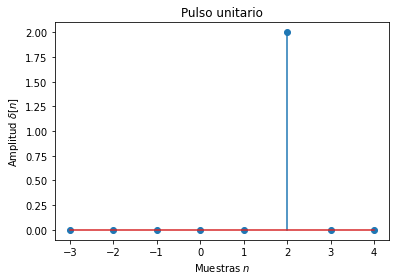

In [65]:
mov = -2
ampl = 2

ini = -3
fin = 4
n = np.arange(ini,fin+1)
delta = ampl*np.concatenate((np.zeros(abs(ini)- mov), np.ones(1), np.zeros(fin + mov)))

plt.stem(n,delta)
plt.title('Pulso unitario')
plt.ylabel('Amplitud $\delta[n]$')
plt.xlabel('Muestras $n$')

## Escalón unitario desplazado y escalado

/home/max/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 0, 'Muestras $n$')

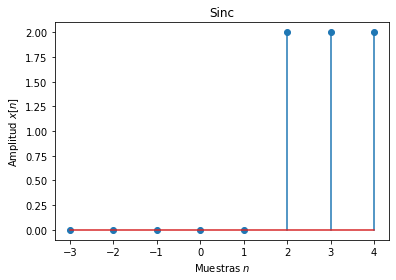

In [67]:
mov = -2
ampl = 2

ini = -3
fin = 4
n = np.arange(ini,fin+1)

U = ampl*np.concatenate((np.zeros(abs(ini) - mov), np.ones(1), np.ones( fin + mov)))


plt.stem(n,U)
plt.title('Sinc')
plt.ylabel('Amplitud $x[n]$')
plt.xlabel('Muestras $n$')

## Tipos de datos

Los **argumentos** que se deben indicar para crear el array son dos: los **elementos que contendrá**, que se ingresan en forma de lista, y el **tipo de datos** que tendrá la lista. En los ejemplos anteriores no especificamos el tipo de datos, ya que éste se asigna automáticamente al crear la lista. No obstante, es recomendable indicarlo siempre ya que cada tipo de datos ocupa un espacio en memoria distinto.

Los tipos de datos que podemos utilizar dentro de un array son los siguientes:
* **Números enteros** de 8, 16, 32 y 64 bits, con signo y sin signo.
* **Números complejos** de 64 y 128 bits.
* **Números de punto flotante** de 16, 32, 64 y 128 bits
* **Booleanos** (‘True’ o ‘False’), **strings**, **bytes...**

En el caso del array 'a' que creamos anteriormente, el formato que se asigna automáticamente es un entero de 64 bits con signo (int64). Nos resulta conveniente utilizar un formato entero sin signo y de 8 bits, de acuerdo a los datos que contiene. El formato se especifica de la siguiente forma:


In [ ]:
b = np.array([1,2,5,9], dtype = np.uint8)

# la consola nos muestra el array
b

En este caso, definimos un array 'b' con un formato adecuado. Entonces, ¿cómo elegimos un tipo de datos conveniente para nuestros arrays? En la siguiente tabla podemos ver los rangos de valores para cada tipo de dato:

| Tipo | Rango | Precisión |
| ---  | ---   | --- |
| int8 | -128 a 127 | |
| int16 | -32768 a 32767 | |
| int32 | -2147483648 a 2147483647 | |
| int64 | -9223372036854775808 a 9223372036854775807 | |
| uint8 | 0 a 255 | |
| uint16 | 0 a 65535 | |
| uint32 | 0 a 4294967295 | |
| uint64 | 0 a 18446744073709551615 | |
| float16 | ± 65504 | Hasta 3 dígitos decimales |
| float32 | ± 10^(38.53) | Hasta 6 dígitos decimales |
| float64 | ± 10^(308.25) | Hasta 16 dígitos decimales |

De todo este despliegue de números podemos extraer las siguientes premisas:

* Si utilizamos números **enteros positivos**, es conveniente usar un **formato sin signo** para aprovechar el rango de la mejor manera posible.
* Si deseamos representar valores de **números reales**, utilizamos un **formato float**.
* **Siempre debemos formatear nuestros arrays**. Si no lo especificamos, estaremos utilizando 64 bits (float o entero) para definir a cada elemento de la lista. Esto generalmente no es necesario, y es contraproducente en dos sentidos: consume excesivo espacio en memoria y afecta a la velocidad de los algoritmos, lo que se hace notable cuando trabajamos con arrays extensos (por ejemplo, un archivo wav de varios minutos).

Contamos con algunos **comandos útiles para saber el tamaño de un array y de sus elementos** (cantidad de bytes que ocupa en memoria):


In [ ]:
# devuelve el número de bytes del array 'a'
bytes_array_a = a.nbytes

# devuelve el número de bytes que ocupa cada elemento de 'a'
bytes_item_a = a.itemsize

print ("El array 'a' ocupa %r bytes, y cada uno de sus elementos ocupa %r bytes. \n" 
       % (bytes_array_a, bytes_item_a))

print ("Éstos son todos los formatos que admite Numpy:")
# devuelve el número de bytes que ocupan los elementos de cada tipo de datos disponibles en Numpy
np.nbytes

### Definamos el formato numerico mas conveniente

Ahora veamos algunos ejemplos para poner en práctica lo que mencionamos. Definamos los formatos que son más convenientes para los siguientes arrays:

In [ ]:
a = [-1, 0, 1] 
b = [0.2, 12.7,-30.52]
c = [10**10, 12**10, 3**18, 0]
d = [3 + 1j, -5j]

arr_a = np.array(a, dtype = ) # completar
arr_b = np.array(b, dtype = ) # completar
arr_c = np.array([c], dtype = ) # completar
arr_d = np.array([d], dtype = ) # completar

print (" array a: ", arr_a,"\n array b: ", arr_b, "\n array c: ", arr_c,
      "\n array d: ", arr_d)

In [ ]:
arr_a//2

## Longitud y dimensiones de un array

Los ejemplos mencionados hasta ahora han sido de arrays de dimensiones $1 x N$. Podemos crear **arrays de varias dimensiones** de la siguiente manera:

In [ ]:
# array de dos dimensiones y longitud igual a 3
b = np.array([[1,2,3],[3,2,1]], dtype = np.uint8)

# array de tres dimensiones y longitud igual a 2
c = np.array([[1,-1],[0,1],[-5,2]], dtype = np.int8)

La **longitud** representa la cantidad de elementos que posee el array. Su valor, y el de las dimensiones de un array, se pueden obtener de la siguiente manera: 

In [ ]:
# devuelve la forma de un array, de la siguiente forma (n° de filas, n° de columnas)
(dim1, dim2) = b.shape

#longitud del array
longitud = b.size

print(dim1, dim2)
print(longitud)

## Indezado en arrays

Los **índices** se utilizan para indicar la posición de cada elemento de un array. De esta manera, podemos acceder al valor de una posición específica o extraer el valor de un grupo de elementos. Cada elemento posee una posición $[i,j]$, donde $i$ representa el número de fila y $j$ representa el número  de columna en que se ubica.

In [ ]:
# devuelve el elemento de la posición [1,2] del array 'a', igual a 2.
print(b[1,2])

# devuelve el elemento de la posición [2,0] del array 'b', igual a -5.
print(c[2,0])


Es importante tener en cuenta que los índices que se asignan se inician desde 0, por lo que si tengo 4 elementos, sus índices irán del rango de 0 a 3.
Podemos **desplazarnos** dentro de una array, y **seleccionar** un rango de elementos utilizando la notación *[i: j: k]*, donde 'i' representa el índice a partir del cual nos desplazamos, 'j' es el índice en el cual nos detenemos y 'k' es el paso con el cual nos desplazamos a los elementos subsiguientes. 

In [ ]:
s = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5] 
sec = np.array(s, dtype = np.float16)

# desplazamiento a partir del 1° elemento, hasta el 8° (no inclusive), 
# en pasos de cada 2 elementos
print (sec[0:8:2])

# desplazamiento entre las mismas posiciones en pasos de a 1
print (sec[:8])

# desplazamiento desde la posición n-5 hasta la posición 9, siendo n la cantidad de elementos.
print (sec[-5:9])

# desplazamiento desde la posición 7 hasta la posición n-8, en pasos de 1 hacia atrás
print (sec[7:-8:-1])

# desplazamiento desde la posición 4 hasta el final del array
print (sec[3:])

# desplazamiento desde la posición 4 hasta el final del array en pasos de a tres
print (sec[3::3])

# desplazamiento desde el comienzo hasta la posición 6 en pasos de a 2
print (sec[:6:2])

Como se puede ver en el ejemplo, tenemos varias opciones para desplazarnos de distintas maneras. Es posible ir hacia adelante, atrás e indicar las posiciones inicial y final con respecto a la longitud del array. Notemos que el elemento $j$, que indica el fin del desplazamiento, no se incluye en el resultado. Es decir, el resultado nos arroja los **elementos desde $i$ hasta $j-1$**.

Para el caso de **matrices**, el desplazamiento es similar, contando con algunas opciones adicionales. Veamos algunos casos.

In [ ]:
# definimos la misma secuencia, pero en forma de matriz de 3x3
fibo_mtx = np.array([[0,1,1],[2,3,5],[8,13,21]], dtype = np.uint8)

# el desplazamiento es ahora entre dimensiones, para ver las dos primeras (filas 0 y 1):
print(fibo_mtx[0:2], "\n")

# veo elementos de la submatriz de 2x2 (primeras dos filas y dos columnas):
print(fibo_mtx[0:2,0:2], "\n")

# desplazamiento entre los dos primeros elementos de la 3° fila 
print(fibo_mtx[2,0:2], "\n")

# desplazamiento entre filas:
print(fibo_mtx[0:2,0::], "\n")

# desplazamiento entre los elementos de la 2° columna 
print(fibo_mtx[...,1])

La notación *[i , j, k]* sirve para desplazarnos entre filas de una matriz. Por otra parte, podemos acceder a todos los elementos de una columna o fila con la notación *[..., x]* o *[x, ...]* respectivamente, siendo *x* el índice de la columna o fila en la que nos desplazamos.

> **Nota:** Numpy también cuenta con el objeto matrix, que es una subclase del objeto array. La ventaja de usar este objeto es que las operaciones matemáticas son matriciales por defecto, y en un array se hacen elemento a elemento (vamos a este tema en la siguiente sección). A fines prácticos, el array también se puede implementar como matriz, teniendo en consideración lo mencionado anteriormente.

### Apliquemos lo visto en un ejercicio

Apliquemos lo visto sobre índices y desplazamiento en un ejercicio. Éste comienza con la creación de un array a partir de una función. Python nos permite crear objetos llamados funciones para generar una instancia de una función matemática. En este caso, nos valemos de esta cómoda funcionalidad para crear un array con los valores de esa función en un conjunto finito de valores dentro de su dominio.

In [ ]:
# creacion de un array a partir de una función
func = lambda y,x : 0.5*x + np.cos(y)  # creo un objeto 'funcion'
sec = np.fromfunction(func, (3,5), dtype = np.float16)  # armo array con la función fromfunction

# imprimir la cantidad de filas y columnas del array
print()  # completar
print("\n")

# imprimir el valor de la función en el punto (x,y)=(0,0)
print()  # completar
print("\n")

# imprimir los valores de la función para x(i) con i = (1,3) e y(j) con j = (1,2)
print()  # completar
print("\n")

# imprimir los valores de la función para x(i) con i = (0, 2, 4)
print()  # completar
print("\n")


## Referencias

 * *Numpy User Guide*, https://www.numpy.org/
 * Scott, Shell, *An introduction to Numpy and Scipy*, 2014. 
 * Martín, Gaitán. *Curso de Python para ciencias e ingenierías*. Extraido de [GitHub](https://github.com/mgaitan/curso-python-cientifico), 2017.
 * Oppenheim, Alan V.; Willsky, Alan S.; Nawab, S. Hamid. Señales y sistemas. Pearson Educación, 1998.

## Licencia

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licencia de Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />Este documento se destribuye con una <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">licencia Atribución CompartirIgual 4.0 Internacional de Creative Commons</a>.

Material adaptado del curso [Introducción a Python](https://github.com/infiniemlabs-acustica/python_introduccion)

© 2020. Infiniem Labs Acústica. infiniemlab.dsp@gmail.com (CC BY-SA 4.0))